In [2]:
# Importing the numpy library (for arrays operations)
# Importing the pandas library (for data analysis)
# Importing the matplotlib.pyplot interface (for MATLAB-like plots)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset preparation
We start by loading the dataset (csv file) we shall work with. We use Netflix stock price from 01/03/2012 to 12/31/2021 downloaded from investing.com:<br>
https://www.investing.com/equities/netflix,-inc.-historical-data

In [3]:
# Storing the data in DataFrame "df", sorted by date in ascending order

df = pd.read_csv('NFLX Historical Data.csv')
df = df[::-1]
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
2517,"Jan 03, 2012",10.32,10.04,10.39,10.02,29.22M,4.24%
2516,"Jan 04, 2012",11.49,10.34,11.57,10.26,100.55M,11.34%
2515,"Jan 05, 2012",11.33,11.35,11.69,11.04,86.61M,-1.39%
2514,"Jan 06, 2012",12.33,11.30,12.47,11.24,125.66M,8.83%
2513,"Jan 09, 2012",14.03,12.80,14.24,12.45,214.07M,13.79%


In [4]:
# Keeping only the "Open" values of Netflix stock, and rechaping the DataFrame into a vertical numpy array

arr = df['Open'].values
arr = arr.reshape(-1, 1)
arr.shape

(2518, 1)

In [66]:
# Splitting the data into a training set stored in array "arr_train" (first 80% of the rows of "arr")
# And a test set stored in array "arr_test" (last 20% of the rows of "arr").

arr_train = arr[:int(arr.shape[0]*0.8)]
arr_test = arr[int(arr.shape[0]*0.8):]
print(arr_train.shape)
print(arr_test)

(2014, 1)
[[326.78]
 [323.12]
 [336.47]
 [331.49]
 [342.  ]
 [337.13]
 [331.8 ]
 [344.4 ]
 [338.68]
 [343.5 ]
 [341.  ]
 [340.  ]
 [332.55]
 [326.04]
 [348.46]
 [345.95]
 [345.88]
 [349.  ]
 [341.1 ]
 [347.39]
 [347.24]
 [361.  ]
 [375.12]
 [369.6 ]
 [365.04]
 [365.  ]
 [373.75]
 [377.18]
 [376.96]
 [381.47]
 [379.3 ]
 [388.12]
 [386.56]
 [385.33]
 [364.76]
 [372.  ]
 [366.31]
 [371.46]
 [364.21]
 [373.11]
 [381.03]
 [377.77]
 [381.  ]
 [367.7 ]
 [343.86]
 [356.43]
 [358.92]
 [326.5 ]
 [330.51]
 [306.63]
 [306.19]
 [300.77]
 [324.06]
 [342.31]
 [347.89]
 [369.91]
 [360.98]
 [342.29]
 [359.38]
 [363.  ]
 [367.93]
 [376.05]
 [364.08]
 [367.47]
 [365.22]
 [380.  ]
 [374.01]
 [371.06]
 [371.31]
 [397.5 ]
 [413.  ]
 [437.  ]
 [431.  ]
 [435.17]
 [444.77]
 [429.73]
 [419.26]
 [425.  ]
 [425.  ]
 [419.99]
 [399.53]
 [410.31]
 [415.1 ]
 [417.78]
 [427.55]
 [429.3 ]
 [436.89]
 [434.14]
 [436.33]
 [442.  ]
 [435.46]
 [444.73]
 [440.89]
 [451.64]
 [453.39]
 [454.25]
 [448.55]
 [437.  ]
 [427.73]


In [6]:
# Importing the estimator "MinMaxScaler" from the sklearn.preprocessing module
# (to rescale data to a given range, typically the interval [0,1])
# See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.preprocessing import MinMaxScaler

# Rescaling "arr_train" and "arr_test" to the interval [0,1]

scaler = MinMaxScaler()
arr_train = scaler.fit_transform(arr_train)
arr_test = scaler.fit_transform(arr_test)
print('Rescaled arr_train:\n', arr_train[:5], '\n\n', 'Rescaled arr_test:\n', arr_test[:5])

Rescaled arr_train:
 [[0.00563251]
 [0.00635772]
 [0.00879928]
 [0.00867842]
 [0.01230449]] 

 Rescaled arr_test:
 [[0.06642321]
 [0.05707646]
 [0.09116911]
 [0.0784514 ]
 [0.10529138]]


In [7]:
# Defining a function "create_data" which creates two numpy arrays x, y from an input array "arr"
# The 1D numpy array y contains all the last values of arr, starting from the 50th value
# The 2D numpy array x contains all the lists of last 50 values of arr

def create_data(arr):
    x, y = [], []
    for i in range(50, arr.shape[0]):
        x.append(arr[i-50: i, 0])
        y.append(arr[i, 0])
    x, y = np.array(x), np.array(y)
    return x,y 

In [8]:
# Using the function "create_data" to create the training and test datasets

x_train, y_train = create_data(arr_train)
x_test, y_test = create_data(arr_test)

# LSTM model

In [12]:
# Importing the "Sequential" class from the keras.models API (to group a linear stack of layers into a model)
# See https://faroit.com/keras-docs/1.2.0/getting-started/sequential-model-guide/
# See https://keras.io/api/models/sequential/

# Importing the "load_model" function from the keras.models API (to load a model saved via model.save())
# See https://www.geeksforgeeks.org/save-and-load-models-in-tensorflow/
# See https://keras.io/api/models/model_saving_apis/#loadmodel-function

# Importing the "LSTM" class from the keras.layers API (to load the long short-term memory layer to be used)
# See https://keras.io/api/layers/recurrent_layers/lstm/

# Importing the "Dense" class from the keras.layers API (to load the regular densely-connected NN layer to be used)
# See https://keras.io/api/layers/core_layers/dense/

# Importing the "Dropout" class from the keras.layers API (to apply dropout to the input)
# See https://keras.io/api/layers/regularization_layers/dropout/

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [13]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# Saving the model's architecture, weights values, and compile() information in a HDF5 file
# See https://www.tensorflow.org/guide/keras/save_and_serialize#keras_h5_format
# See https://en.wikipedia.org/wiki/Hierarchical_Data_Format

model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_price.h5')

Epoch 1/50
62/62 [==============================] - 8s 66ms/step - loss: 0.0127
Epoch 2/50
62/62 [==============================] - 4s 64ms/step - loss: 0.0027
Epoch 3/50
62/62 [==============================] - 4s 65ms/step - loss: 0.0025
Epoch 4/50
62/62 [==============================] - 4s 65ms/step - loss: 0.0026
Epoch 5/50
62/62 [==============================] - 5s 73ms/step - loss: 0.0022
Epoch 6/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0024
Epoch 7/50
62/62 [==============================] - 5s 74ms/step - loss: 0.0027
Epoch 8/50
62/62 [==============================] - 5s 74ms/step - loss: 0.0019
Epoch 9/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0019
Epoch 10/50
62/62 [==============================] - 5s 75ms/step - loss: 0.0019
Epoch 11/50
62/62 [==============================] - 6s 97ms/step - loss: 0.0019
Epoch 12/50
62/62 [==============================] - 6s 101ms/step - loss: 0.0021
Epoch 13/50
62/62 [=================

In [75]:
# Storing in numpy array "predicted_prices" the stock prices predicted by the LSTM model
# Storing in numpy array "real_prices" the real stock prices
# Rescaling both datasets to the original scale

model = load_model('stock_price.h5')
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

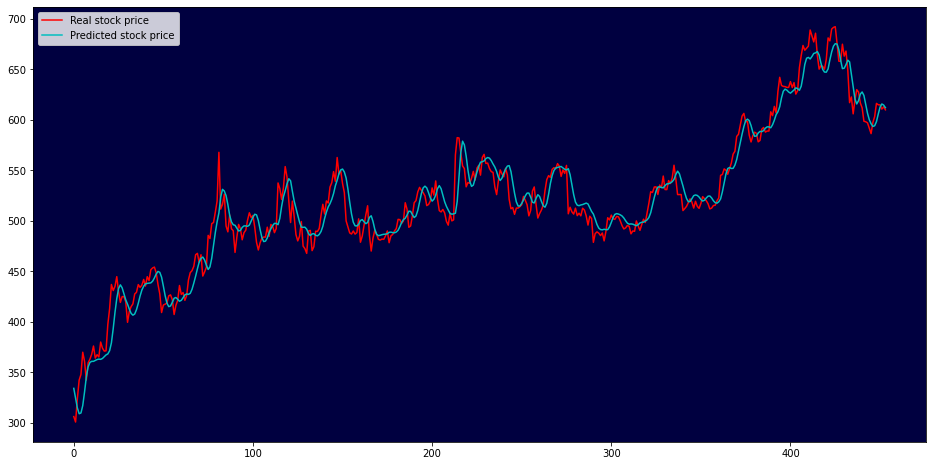

In [70]:
_, p = plt.subplots(figsize=(16,8))

p.plot(real_prices, color='r', label='Real stock price')
p.plot(predicted_prices, color='c', label='Predicted stock price')
p.set_facecolor('#000040')
p.legend()